In [1]:
# let's make sure all these libs get along...
import cdt
import dowhy
import networkx as nx

Detecting 1 CUDA device(s).
sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.


In [2]:
data, graph = cdt.data.load_dataset('sachs')
print(data.head())

   praf  pmek   plcg   PIP2   PIP3  p44/42  pakts473    PKA    PKC   P38  pjnk
0  26.4  13.2   8.82  18.30  58.80    6.61      17.0  414.0  17.00  44.9  40.0
1  35.9  16.5  12.30  16.80   8.13   18.60      32.5  352.0   3.37  16.5  61.5
2  59.4  44.1  14.60  10.20  13.00   14.90      32.5  403.0  11.40  31.9  19.5
3  73.0  82.8  23.10  13.50   1.29    5.83      11.8  528.0  13.70  28.6  23.1
4  33.7  19.8   5.19   9.73  24.80   21.10      46.1  305.0   4.66  25.7  81.3


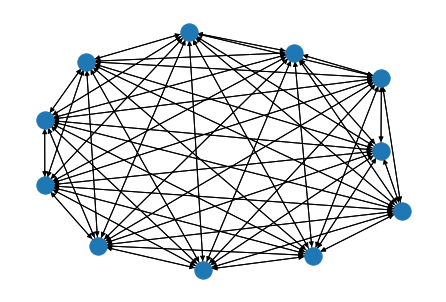

In [3]:
glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(data)
nx.draw(skeleton)

In [4]:
new_skeleton = cdt.utils.graph.remove_indirect_links(skeleton, alg='aracne')
nx.adjacency_matrix(new_skeleton).todense()

matrix([[9.26744031e-04, 0.00000000e+00, 1.66612981e-05, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 7.00340545e-05, 0.00000000e+00,
         0.00000000e+00, 2.29788237e-06, 8.31264711e-06],
        [0.00000000e+00, 4.14978956e-04, 0.00000000e+00, 0.00000000e+00,
         2.04443539e-05, 8.24208108e-05, 0.00000000e+00, 1.62688021e-06,
         8.63444133e-06, 0.00000000e+00, 0.00000000e+00],
        [1.66612981e-05, 0.00000000e+00, 2.60824802e-04, 0.00000000e+00,
         8.78979413e-05, 2.17234579e-05, 0.00000000e+00, 1.23313600e-06,
         2.12954874e-05, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.68622146e-05,
         0.00000000e+00, 3.08709259e-06, 0.00000000e+00, 9.09261370e-09,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 2.04443539e-05, 8.78979413e-05, 0.00000000e+00,
         6.09681818e-04, 0.00000000e+00, 1.78188074e-05, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+0

In [5]:
model = cdt.causality.graph.GES()
output_graph = model.predict(data, new_skeleton)
nx.adjacency_matrix(output_graph).todense()

GES is ran on the skeleton of the given graph.


matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

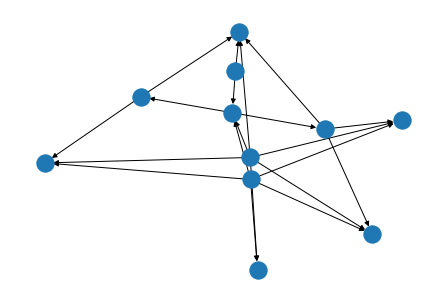

In [6]:
nx.draw(output_graph)